In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import quantile_transform

<h1> $$ Question\space  1.1$$

All four genomic features demonstrate signal peaks throughout their sequences, though I believe (if I am interpreting this correctly) H3K27ac is the sequence showing mainly diffuse signals

<h1> $$ Question\space  1.2$$

All three of the genes show multiple combinations of features except H3K36me3; All of them share the same 3 common sequences for folding over a certain control pool

<h1> $$ Question\space  1.3$$

H3K36me3 only has one feature, which is the control change over a fold at a certain gene

<h1> $$ Question\space  1.4$$

You notice a mixture of similar peaks

<h1> $$ Question\space  1.5$$

By dividing the genes into equal sized bins, and each bin being reserved for different signal levels of the 4 features, then you can cluster the genes based on the given bins that each signal level falls in. Once the data is clustered, you will begin to see similarities between your clustered data and the features

<h1> $$Question\space 2.1 \space and \space2.2$$

In [2]:
pos_data = []
neg_data = []

with open('seq_pos.txt') as f:
    text = f.read()
    
for i in range(len(text)):
    pos_data.append(text[i])

with open('seq_neg.txt') as g:
    text1 = g.read()

for i in range(len(text1)):
    neg_data.append(text1[i])

In [3]:
pos_counter = 0
neg_counter = 0

for i in pos_data:
    if i == 'G' or i == 'C':
        pos_counter += 1

for i in neg_data:
    if i == 'G' or i == 'C':
        neg_counter += 1


In [4]:
print("Fraction of G's and C's in the postive sequence are:",pos_counter/len(pos_data))

print("Fraction of G's and C's in the negative sequence are:",neg_counter/len(neg_data))

Fraction of G's and C's in the postive sequence are: 0.6071428571428571
Fraction of G's and C's in the negative sequence are: 0.49357142857142855


<h1> $$Question\space 2.3$$

(array([112.,   0.,  71.,   0.,   0., 143.,   0.,  74.,   0.,  20.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

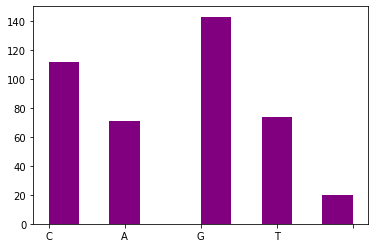

In [5]:
plt.hist(pos_data,color = 'purple')

(array([1081.,    0.,  992.,    0.,    0., 1016.,    0.,  911.,    0.,
         200.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

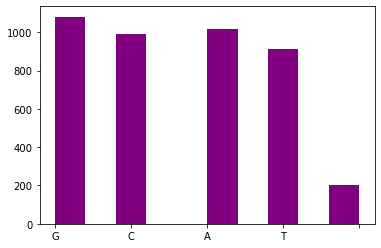

In [6]:
plt.hist(neg_data,color = 'purple')

<h1> $$Question\space 2.4$$

No, the distributions are not similar; The GC content of the negative data is much more evenly distributed than the GC distribution of the positive data

<h1> $$Question\space 2.5$$

In [1]:
#Identify the negative set

#Create an array for only the negative set

#Using np.random, choose a random sample

#Display your samples to see if the distribution is similar to that of the positive set

<h1> $$Question\space 3.1$$

In [8]:
gene_act = pd.read_csv('gene_act.txt',delimiter='\t')

In [9]:
gene_act

,gene_id,H1_Cell_Line,H1_BMP4_Derived_Mesendoderm_Cultured_Cells,H1_BMP4_Derived_Trophoblast_Cultured_Cells,H1_Derived_Mesenchymal_Stem_Cells,H1_Derived_Neuronal_Progenitor_Cultured_Cells,hESC_Derived_CD184_Endoderm_Cultured_Cells,hESC_Derived_CD56_Ectoderm_Cultured_Cells,hESC_Derived_CD56_Mesoderm_Cultured_Cells,HUES64_Cell_Line,...,A549_EtOH_002_pct_Lung_Carcinoma,GM12878_Lymphoblastoid,Hela_S3_Cervical_Carcinoma,HepG2_Hepatocellular_Carcinoma,HMEC_Mammary_Epithelial,HSMM_Skeletal_Muscle_Myoblasts,HUVEC_Umbillical_Vein_Endothelial_Cells,K562_Leukemia,NHEK_Epidermal_Keratinocytes,NHLF_Lung_Fibroblasts
0,ENSG00000133226,105,90,62,34,97,44,49,31,39,...,16,13,17,12,17,15,9,27,15,15
1,ENSG00000182771,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000228078,0,0,0,0,0,1,0,0,0,...,0,21,0,1,17,0,0,0,0,0
3,ENSG00000131584,4,3,8,9,6,15,9,8,6,...,1,1,4,13,6,4,11,4,7,4
4,ENSG00000198925,29,15,21,16,15,18,14,15,14,...,28,7,14,71,26,23,49,22,15,15
5,ENSG00000175356,0,0,0,0,1,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ENSG00000166595,53,54,43,68,62,62,42,66,53,...,96,106,107,254,131,101,240,128,87,69
7,ENSG00000160216,2,3,3,16,2,6,3,3,1,...,6,12,5,11,4,8,17,14,7,12
8,ENSG00000086062,13,13,81,42,10,19,8,32,12,...,124,25,123,33,61,62,54,8,52,38
9,ENSG00000175166,47,63,68,41,44,67,70,100,84,...,84,38,96,44,173,99,102,93,201,91


In [13]:
bp = []

for i in range(49):
   bp.append(gene_act.loc[i+1][1:-1])


Text(0.5, 1.0, 'Figure 1: Rows 0 - 14')

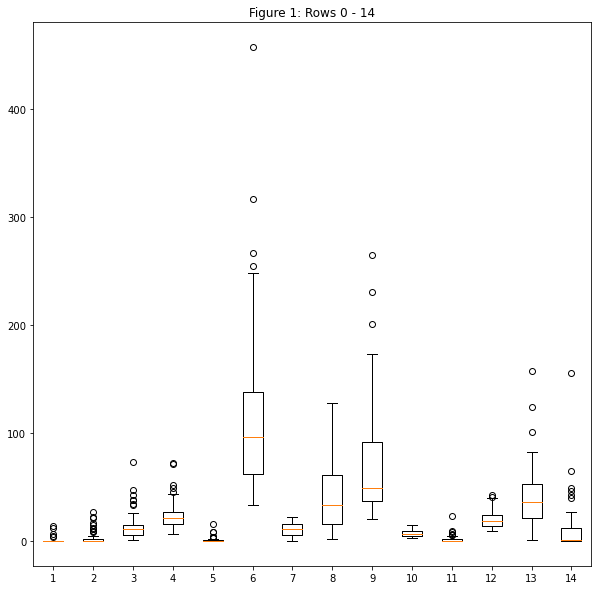

In [14]:
#Plotting Code

#NOTE:

#The entire dataset is broken up into 3 seperate boxplots across 3 different cells for readability
#Some of the boxplots are unreadable due to the outlier variables in the dataset; I can get rid of those, 
#but for the sake of showing all the data I am keeping them in


fig = plt.figure(figsize=(10,10))
box1 = plt.boxplot(bp[0:14])
plt.title('Figure 1: Rows 0 - 14')

Text(0.5, 1.0, 'Figure 2: Rows 15 - 30')

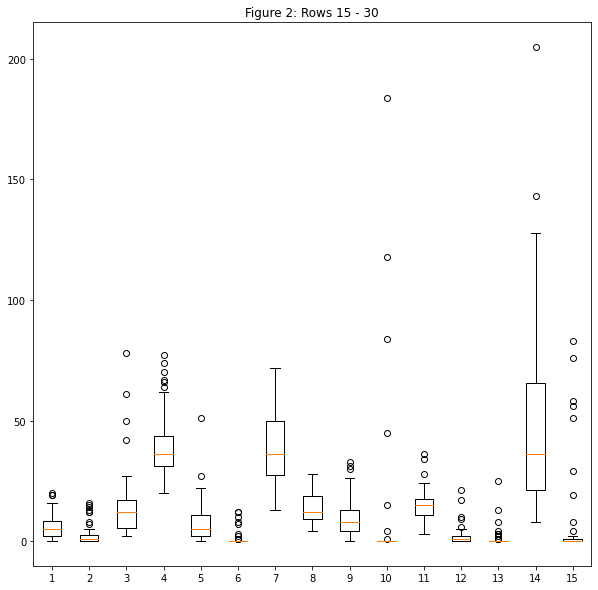

In [26]:
fig = plt.figure(figsize=(10,10))

box2 = plt.boxplot(bp[15:30])
plt.title('Figure 2: Rows 15 - 30')

Text(0.5, 1.0, 'Figure 3: Rows 31 - 50')

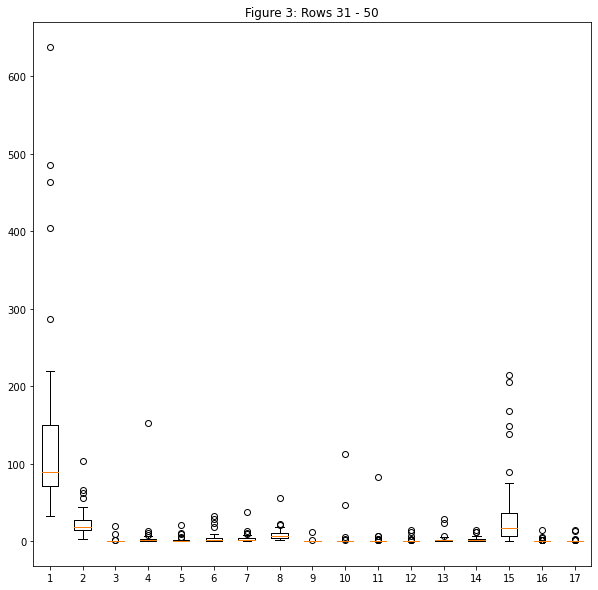

In [16]:
fig = plt.figure(figsize=(10,10))

box3 = plt.boxplot(bp[31:-1])
plt.title('Figure 3: Rows 31 - 50')

<h1> $$Question\space 3.2$$

Yes; A majority of the gene distributions are in fact comparable to one another. The only ones that aren't are the ones with extreme outliers, which were rows 14 and 31. Those two kind of ruined the distribution of the boxplots and forced me to seperate them into 3 seperate cells for readability

<h1> $$Question\space 3.3$$

In [17]:
#Function for calculating a z-score 

def calc_zscore(a=[],b=[],c=[]):
    z_score = (len(a) - statistics.mean(b)) / statistics.stdev(c)
    return z_score

In [18]:
#Empty list to append all z_score values to
z_list = []

#Appending all calculated z_score values to the z_list
for i in bp:
    z_list.append(calc_zscore(i,i,i))

In [30]:
z_list

[20.788046015507497,
 8.121035618207516,
 3.0308072109137485,
 2.297872881649414,
 20.41008154249827,
 -0.7313550078523807,
 7.954951288348659,
 0.3466991979941926,
 -0.3066169519065678,
 16.0,
 14.976905298081187,
 4.014775342734831,
 0.5073825686188038,
 1.7728105208558367,
 -0.14692640569650758,
 10.0,
 12.49221980096234,
 2.8428385056542993,
 1.1547005383792517,
 5.774705379690139,
 19.09188309203678,
 1.1409652938638413,
 6.4049399539693965,
 6.147008563985761,
 1.4952691929930777,
 6.575959492214292,
 13.5,
 13.9427400463467,
 0.12294255990122585,
 2.478709341572747,
 11.129112402035611,
 -0.6539292870344615,
 1.8758732216337575,
 19.445436482630054,
 2.4944915390270443,
 16.281612607199236,
 7.666981720054651,
 9.827076298239907,
 5.785300076028638,
 38.89087296526011,
 3.21257072871912,
 4.829906831399546,
 22.45365597551247,
 11.259778359082038,
 17.666666666666668,
 0.3999200239920028,
 27.5,
 22.45365597551247,
 15.01110699893027]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef83a7c9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef83a070a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef83a7c640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef83a07760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef83a07ac0>],
 'means': []}

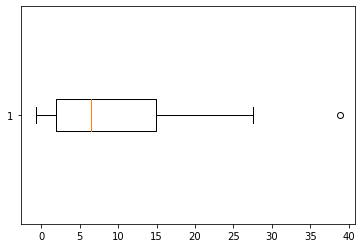

In [31]:
plt.boxplot(z_list,vert=False)

<h1> $$Question\space 3.4$$

In [20]:
quant = quantile_transform(bp, n_quantiles=4, random_state=0, copy=True)

In [33]:
quant[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.4       , 0.68103448, 0.66666667, 0.56410256, 0.58333333,
       0.        , 0.        , 0.        , 0.        , 0.63888889,
       0.6798419 , 0.        , 0.        , 0.47222222, 0.63333333,
       0.        , 0.69177127, 0.        , 0.33333333, 0.33333333,
       0.        , 0.33333333, 0.33333333, 0.54545455, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33333333, 0.35555556, 0.33333333,
       0.        , 0.        , 0.67728238, 0.        , 0.36363636,
       0.68292683, 0.        , 0.        , 0.        , 0.        ])

Text(0.5, 1.0, 'Figure 4: Rows 0 - 55')

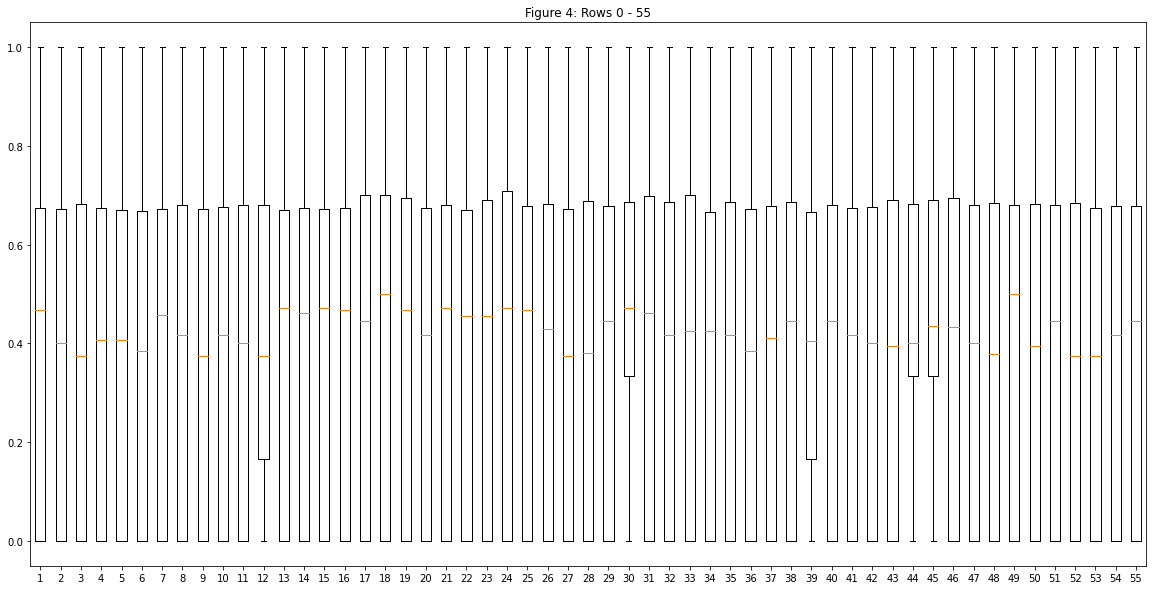

In [24]:
#Plotting Code

#NOTE:

#The entire dataset is broken up into 3 seperate boxplots across 3 different cells for readability
#Some of the boxplots are unreadable due to the outlier variables in the dataset; I can get rid of those, 
#but for the sake of showing all the data I am keeping them in


fig = plt.figure(figsize=(20,10))
box1 = plt.boxplot(quant)
plt.title('Figure 4: Rows 0 - 55')

<h1> $$Question\space 3.5$$

Between quantile normalization and calculating the z_score, in both instances there is a great deal of variability within the data